In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import ensemble  # pakiet z lasami decyzyjnymi
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection
from mlxtend import plotting

In [50]:
wine_red = pd.read_csv('winequality-red.csv')
wine_white = pd.read_csv('winequality-white.csv')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


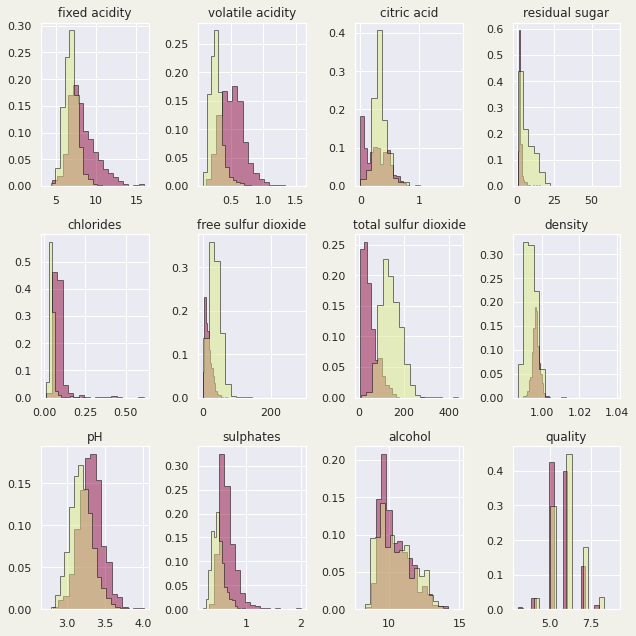

In [109]:
sns.set_style("darkgrid")
sns.set_context("notebook")

fig, axs = plt.subplots(3,4, figsize=(9, 9), facecolor='#F1F0E9', edgecolor='black',tight_layout=True)
fig.subplots_adjust()


axs = axs.ravel()

for i,x in enumerate(wine_red):
    axs[i].hist(wine_red[x],color="#900C3F",bins=18,edgecolor='black',alpha = 0.5,weights=np.ones(len(wine_red[x])) / len(wine_red[x]),histtype="stepfilled")
    axs[i].hist(wine_white[x],color="#DDEB86",bins=18,edgecolor='black',alpha = 0.5,weights=np.ones(len(wine_white[x])) / len(wine_white[x]),histtype="stepfilled")
    axs[i].set_title(x)

In [52]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [53]:
print(f"Is there any null value? - > {wine_red.isnull().values.any()}\nIs there any na value? - > {wine_red.isna().values.any()}")

Is there any null value? - > False
Is there any na value? - > False


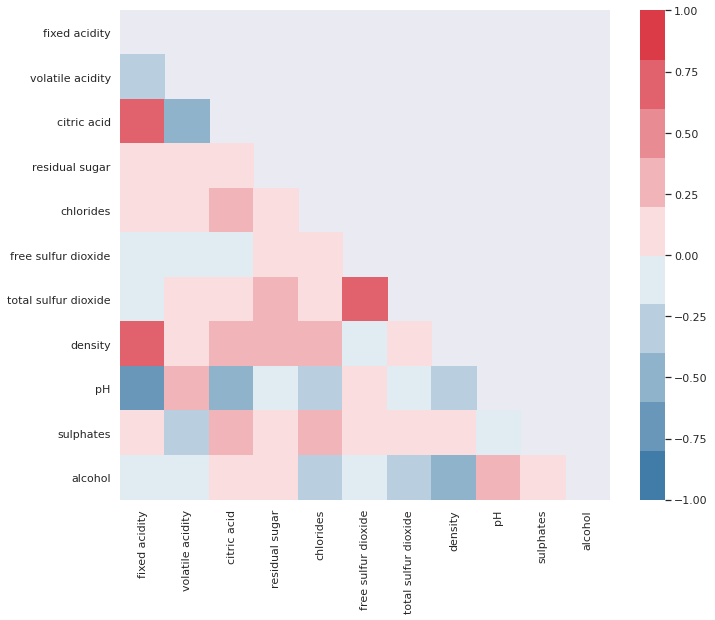

In [54]:
correlation_matrix = np.round(wine_red.drop("quality",axis=1).corr(),2)

sns.set(rc={'figure.figsize':(11,9)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(correlation_matrix), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(correlation_matrix,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

In [55]:
X = wine_red.drop("quality",axis=1)
y = wine_red["quality"]

In [56]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,y,random_state=2021,test_size=0.2)

In [57]:
rf_classifier = ensemble.RandomForestClassifier(
    n_estimators = 100, criterion = 'gini', bootstrap=True)
rf_classifier.fit(train_x, train_y)
rf_classifier.score(test_x, test_y)

0.6875

In [58]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')
decision_tree.fit(train_x, train_y)
decision_tree.score(test_x, test_y)


0.603125

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
logreg.score(test_x,test_y)

0.61875

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.neighbors import BallTree
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors, weights='uniform',algorithm='auto')
##------------- pipeline wraz z normalizacją ---------
knn_pipeline = make_pipeline(MinMaxScaler(), knn)
knn_pipeline.fit(X, y)
knn_pipeline.score(test_x,test_y)


0.721875

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = knn_pipeline.predict(test_x)

In [48]:
print("Mean accuracy for train set: \n", knn_pipeline.score(X, y))
print("Confusion matrix : \n", confusion_matrix(test_y, predictions))
print("Classification report: \n", classification_report(test_y, predictions))

Mean accuracy for train set: 
 0.7110694183864915
Confusion matrix : 
 [[  0   0   1   1   0   0]
 [  0   2   4   4   0   0]
 [  0   0 115  22   0   0]
 [  0   0  29  94   6   0]
 [  0   0   4  15  20   0]
 [  0   0   1   0   2   0]]
Classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.20      0.33        10
           5       0.75      0.84      0.79       137
           6       0.69      0.73      0.71       129
           7       0.71      0.51      0.60        39
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.53      0.38      0.41       320
weighted avg       0.72      0.72      0.71       320

